In [1]:
from weatherov import Weather, plot
from datetime import datetime, timedelta
from pytz import timezone
%matplotlib inline

Misc. parameters (timezone is optional, only needed to avoid problems in some methods, see further below).

In [2]:
source = 'darksky'    # Can be 'darksky' or 'owm' (OpenWeatherMap) 
api_key = ...         # Put here your corresponding API key

In [3]:
Lyon = 45.77, 4.84             # lat, long coordinates
tz = timezone('Europe/Paris')  # local timezone (can also be detected with tzlocal)

Instantiate weather object from which all methods will be applied later

In [4]:
w = Weather(Lyon, source=source, api_key=api_key)

# Current conditions

Full dict of raw data (including forecast, alerts, etc.), depends on source:

In [5]:
data = w.fetch()
data['currently']   # actual keys vary depending on source

{'time': 1610702268,
 'summary': 'Possible Light Rain',
 'icon': 'rain',
 'precipIntensity': 0.2668,
 'precipProbability': 0.52,
 'precipType': 'rain',
 'temperature': 4.38,
 'apparentTemperature': 1.45,
 'dewPoint': 3.71,
 'humidity': 0.95,
 'pressure': 1020.8,
 'windSpeed': 12.36,
 'windGust': 29.22,
 'windBearing': 316,
 'cloudCover': 0.98,
 'uvIndex': 0,
 'visibility': 16.093,
 'ozone': 371.5}

Simpilfied, formatted data, independent of source:

In [6]:
data = w.current()
data

{'t': datetime.datetime(2021, 1, 15, 10, 17, 58, tzinfo=<DstTzInfo 'Europe/Paris' CET+1:00:00 STD>),
 'T': 4.38,
 'RH': 95.0,
 'P': 1020.8,
 'wind speed': 12.36,
 'wind gust': 29.22,
 'wind direction': 316,
 'rain': 0.2668,
 'visibility': 16.093,
 'clouds': 98.0}

Get and plot current conditions, including forecast

In [7]:
data = w.hourly()
data['t'], data['T']  # hourly times and temperatures

([datetime.datetime(2021, 1, 15, 0, 0, tzinfo=<DstTzInfo 'Europe/Paris' CET+1:00:00 STD>),
  datetime.datetime(2021, 1, 15, 1, 0, tzinfo=<DstTzInfo 'Europe/Paris' CET+1:00:00 STD>),
  datetime.datetime(2021, 1, 15, 2, 0, tzinfo=<DstTzInfo 'Europe/Paris' CET+1:00:00 STD>),
  datetime.datetime(2021, 1, 15, 3, 0, tzinfo=<DstTzInfo 'Europe/Paris' CET+1:00:00 STD>),
  datetime.datetime(2021, 1, 15, 4, 0, tzinfo=<DstTzInfo 'Europe/Paris' CET+1:00:00 STD>),
  datetime.datetime(2021, 1, 15, 5, 0, tzinfo=<DstTzInfo 'Europe/Paris' CET+1:00:00 STD>),
  datetime.datetime(2021, 1, 15, 6, 0, tzinfo=<DstTzInfo 'Europe/Paris' CET+1:00:00 STD>),
  datetime.datetime(2021, 1, 15, 7, 0, tzinfo=<DstTzInfo 'Europe/Paris' CET+1:00:00 STD>),
  datetime.datetime(2021, 1, 15, 8, 0, tzinfo=<DstTzInfo 'Europe/Paris' CET+1:00:00 STD>),
  datetime.datetime(2021, 1, 15, 9, 0, tzinfo=<DstTzInfo 'Europe/Paris' CET+1:00:00 STD>),
  datetime.datetime(2021, 1, 15, 10, 0, tzinfo=<DstTzInfo 'Europe/Paris' CET+1:00:00 STD>)

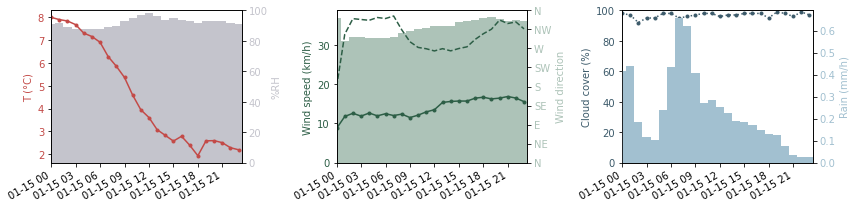

In [8]:
plot(data);

It is also possible to get the URL of the data in the API to use it directly in a browser to access the raw data:

In [9]:
w.url()

'https://api.darksky.net/forecast/8984f2d5f4d874a40cea99064cf571e9/45.77,4.84?units=ca'

# Weather in the past

To get historical weather data, the same methods as above can be used with a `datetime` input. To avoid surprises, it is better to specify the timezone for unambiguous time information:

In [10]:
date = tz.localize(datetime(2021, 1, 10, 10))
print(f'URL to access historical data on {date} from a browser:\n', w.url(date))
data = w.fetch(date)
data['currently']  # Current weather at the specified datetime

URL to access historical data on 2021-01-10 10:00:00+01:00 from a browser:
 https://api.darksky.net/forecast/8984f2d5f4d874a40cea99064cf571e9/45.77,4.84,1610269200?units=ca


{'time': 1610269200,
 'summary': 'Partly Cloudy',
 'icon': 'partly-cloudy-day',
 'precipIntensity': 0,
 'precipProbability': 0,
 'temperature': -2.45,
 'apparentTemperature': -6.7,
 'dewPoint': -4.54,
 'humidity': 0.86,
 'pressure': 1019.2,
 'windSpeed': 11.8,
 'windGust': 28.57,
 'windBearing': 345,
 'cloudCover': 0.4,
 'uvIndex': 0,
 'visibility': 16.093,
 'ozone': 328}

*Note*: The `data` dictionary also includes hourly data for the particular day of the specified date. Formatting depends on the source API.

For source-independent data able to be plotted with the weatherov module, use higher level functions:

In [11]:
w.current(date)  # current conditions at specified date

{'t': datetime.datetime(2021, 1, 10, 10, 0, tzinfo=<DstTzInfo 'Europe/Paris' CET+1:00:00 STD>),
 'T': -2.45,
 'RH': 86.0,
 'P': 1019.2,
 'wind speed': 11.8,
 'wind gust': 28.57,
 'wind direction': 345,
 'rain': 0,
 'visibility': 16.093,
 'clouds': 40.0}

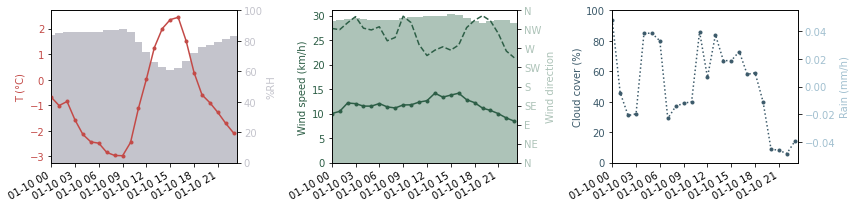

In [12]:
data = w.hourly(date)  # hourly data of that particular day
plot(data);

# Save into / Load from files

Download current conditions:

In [13]:
w.download(path='Test')

Download started in folder Test
Download finished in 0.63 seconds.
No missing days in Test between 01/15/21 and 01/15/21


*Note:* This is equivalent to `data = w.fetch()` followed by `w.save(data, path='Test')`

Download conditions at a specific date in the past:

In [14]:
date = tz.localize(datetime(2021, 1, 10))
w.download(date, path='Test')

Download started in folder Test
Download finished in 0.56 seconds.
No missing days in Test between 01/10/21 and 01/10/21


Download conditions for several consecutive days in the past. There are two methods:
- Specifying start date and end date
- Specifying start date and number of days

In [15]:
date1 = tz.localize(datetime(2021, 1, 10))
date2 = tz.localize(datetime(2021, 1 ,13))
w.download(date1, until=date2, path='Test')

Download started in folder Test
Download finished in 0.76 seconds.
No missing days in Test between 01/10/21 and 01/13/21


In [16]:
date1 = tz.localize(datetime(2021, 1, 10))
w.download(date1, ndays=4, path='Test')

Download started in folder Test
Download finished in 0.57 seconds.
No missing days in Test between 01/10/21 and 01/13/21


Load data from saved files (equivalent to a `fetch()` from the API --> returns raw data specific to the source API used initially):

In [17]:
date = tz.localize(datetime(2021, 1, 11))
data = w.load(date, path='Test')
data['currently']

{'time': 1610319600,
 'summary': 'Clear',
 'icon': 'clear-night',
 'precipIntensity': 0,
 'precipProbability': 0,
 'temperature': -2.52,
 'apparentTemperature': -5.69,
 'dewPoint': -4.77,
 'humidity': 0.85,
 'pressure': 1022,
 'windSpeed': 8.04,
 'windGust': 19.67,
 'windBearing': 325,
 'cloudCover': 0.24,
 'uvIndex': 0,
 'visibility': 16.093,
 'ozone': 314.4}

Load data from files, but into formatted data independent of source:

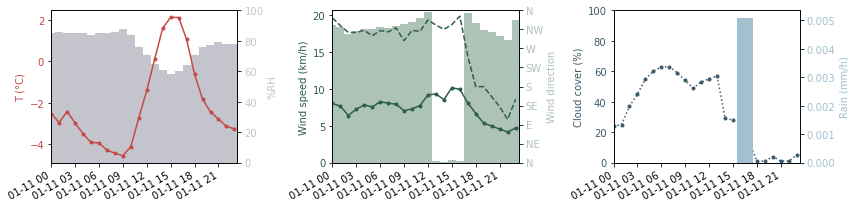

In [18]:
date = tz.localize(datetime(2021, 1, 11))
data = w.hourly(date, path='Test')  # data is a dict, that can be plotted directly:
plot(data);

Here, it is also possible to load several consecutive days with the same type of arguments as with `download()`:

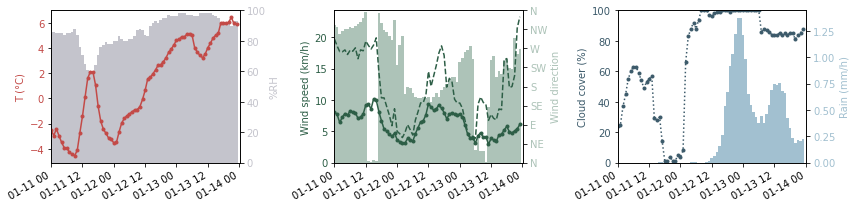

In [19]:
date = tz.localize(datetime(2021, 1, 11))

data = w.hourly(date, ndays=3, path='Test')
# OR
data = w.hourly(date, until=date + timedelta(days=2), path='Test')

plot(data);

It is possible to check whether there are any missing downloaded days, and to download them if necessary. Again, the arguments are similar to `download()` and `hourly()`:

In [20]:
date = tz.localize(datetime(2021, 1, 11))

w.missing_days(date, ndays=5, path='Test')
# OR
w.missing_days(date, until=date + timedelta(days=4), path='Test')

No missing days in Test between 01/11/21 and 01/15/21
No missing days in Test between 01/11/21 and 01/15/21


[]

In [21]:
w.download_missing_days(date, ndays=6, path='Test')  # using `until` would also work

No missing days in Test between 01/11/21 and 01/16/21
